# Application of Data Cleaning Methods to Exoplanets Dataset

Welcome to the data-cleaning notebook. Here, you will learn some techniques for using pandas to clean a dataset. We will use data from the Extrasolar planet encyclopedia, which is contained within a csv file. It is very messy as it comes from different sources. Our task will consist in cleaning and filtering everything to get a comprehensive data frame. The questions we will be trying to answer are: How does the mass of the planets correlate with their radius? Does this tell us anything about the planets' compositions?

## Background knowledge on exoplanets and their detection

We define an exoplanet as one that is outside our solar system. They have been an increasingly popular topic as we expand our search for planets that are potentially similar to our own. An easy classification of them would be gas giants and small rocky planets. You can find out more about exoplanets and the discoveries linked to them __[here](https://eos.org/space-planets)__.


__Primary Transit method:__ Detection of changes in a star's luminosity as the planet orbits around it. As the planet passes in front of its local star, the luminosity of the latter will diminish by a small amount. This variation will also allow the calculation of the planet's radius.

__Radial velocity method:__ Detection of motion fluctuation from a planet's local star due to the directional change of gravitational pull it would have on it. To evaluate the variation of a star's motion, we look at its spectrum. It will be either blueshifted or redshifted depending on whether the star is moving towards or away from us.

These 2 main detection methods are not entirely separate. Whilst the Primary detection method detects a lot of exoplanets, it also has a lot of false positives. Thus, detecting an exoplanet with Primary Transit before confirming this with radial velocity is common. Due to the brightness of the local star compared to exoplanets, very few direct observations occur. These methods both look at indirect factors. There are also other detection methods, but they have lower success rates.

In [44]:
# If you're running this notebook, uncomment the code in this cell to install the required packages.
# ! pip install pandas
# ! pip install seaborn
# ! pip install matplotlib
# ! pip install numpy

In [45]:
import pandas as pd
import matplotlib as plt
import seaborn as sb
import numpy as np

#you will need to imput this path

path = ''
sb.set_style('whitegrid')

## Loading the csv file and looking at the uncleaned data 

In [46]:
kepler_base = pd.read_csv(path+'exoplanet_dataset.csv')

#looking at the first 20 rows of data and getting the total size of the dataset
print(kepler_base.head(20))
print(f'Rows: {kepler_base.shape[0]} ; Columns: {kepler_base.shape[1]}')

                    # name planet_status   mass  mass_error_min  \
0    OGLE-2016-BLG-1469L b     Confirmed  13.60            3.00   
1                 11 Com b     Confirmed  19.40            1.50   
2                 11 Oph b     Confirmed  21.00            3.00   
3                 11 UMi b     Confirmed  10.50            2.47   
4                 14 And b     Confirmed   5.33            0.57   
5                 14 Her b     Confirmed   4.64            0.19   
6               16 Cyg B b     Confirmed   1.68            0.07   
7                 18 Del b     Confirmed  10.30             NaN   
8               1I/2017 U1     Confirmed    NaN             NaN   
9              1RXS 1609 b     Confirmed  14.00            3.00   
10          1SWASP J1407 b     Confirmed  20.00            6.00   
11                24 Sex b     Confirmed   1.99            0.38   
12                24 Sex c     Confirmed   0.86            0.22   
13       2M 0103-55 (AB) b     Confirmed  13.00            1.0

In [47]:
#getting the names of the different columns
print(kepler_base.columns.values.tolist())

['# name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max', 'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius', 'radius_error_min', 'radius_error_max', 'orbital_period', 'orbital_period_error_min', 'orbital_period_error_max', 'semi_major_axis', 'semi_major_axis_error_min', 'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min', 'eccentricity_error_max', 'inclination', 'inclination_error_min', 'inclination_error_max', 'angular_distance', 'discovered', 'updated', 'omega', 'omega_error_min', 'omega_error_max', 'tperi', 'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min', 'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min', 'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min', 'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min', 'lambda_angle_error_max', 'impact_parameter', 'impact_parameter_error_min', 'impact_parameter_error_max', 'tzero_vr', 'tzero_vr_error_min', 'tzero_vr_error_max', 'k', 'k_error_min', '

The initial look at the data shows multiple characteristics of the dataset. 

Firstly, we observe that it contains both __quantitative__ (expressed in numbers and analysed through statistical methods) and __qualitative__ (expressed in words and analysed through interpretations and categorisations) data. There also seems to be a lot of duplicated or missing data. For example, we observe that the column mass_sini is an incomplete version of the column mass. Although we are only looking at the first 20 rows, we can see that some columns, such as star_detected_disc, have a lot of Nan values. Lastly, looking at the column names, we observe that many of them will not help us in answering the questions we have set. 

All of these observations provide clues on the type of cleaning methods we will need to use.

## An initial rough clean of the dataset

There is no need to apply cleaning methods to columns that we are not going to be using. So, we start by creating a list of columns that to drop from the data frame.

We will use several methods for deciding which columns to discard:

        - Some columns, such as the 'error' ones, are not of interest to us. They might have been if we have different questions to resolve. Had one of the questions been about the link between detection methods used and the success rate, we would have wanted to keep these columns as they would have provided information on the apparatus used. We will discard them by identifying that they all have the word 'error' within their title.
        - Some columns do not have information within them (every row has the same answer or is empty). We will discard these by using a filter that operates according to the number of unique values in a column.
        - Some columns have information, but not enough to be interesting. In this case, we will use a filter that operates based on the overall count of valid values in a column.
        - Some columns won't be useful in answering the question, and we will need to manually select them.
        
We will use the `drop()` function to do all of this.

In [48]:
#list of column names in dataset
column_name = kepler_base.columns

#list of columns to drop
columns_drop = []


#dropping the error columns
for col in column_name:
    if 'error' in col:
        columns_drop.append(col)

kepler_drop = kepler_base.drop(columns= columns_drop)

Some rows have infinite values. These do not give us any more information than nan values so for ease of reading we will transform these inf values into nan ones. It will enable us to quickly identify null cells. This will also be useful for the next steps, where we want to look at the number of individual values a column has.

There seem to be some columns that do not provide any valuable information (for example: planet status). Using `unique()`, we can manually look at the different values in these columns and see whether they are all the same.

In [49]:
def transfer_inf(df):
    for column in df:
        infinities = (df[column] == np.inf)
        if infinities.sum() > 0:
            df.loc[infinities, column] = 'nan'

    return df

kepler_drop = transfer_inf(kepler_drop)


print(kepler_base['planet_status'].unique())

['Confirmed']


As all stars have the same status, we are not getting any additional information from this column. We cannot individually look at all columns to see the number of unique values they have. The snippet of code below will select all columns that have only 1 singular value.

In [50]:
singular = []
for col in kepler_base:
    list = kepler_base[col]

    if len(list.unique()) < 2:
        #print(col)
        singular.append(col)
        #print(list.unique())

kepler_drop=kepler_drop.drop(columns= singular)

Descriptive columns (such as the star's name) will also not be of any use to us. Because they do not have any attributes in common we need to manually decide which ones we want to remove and put them in a list.

In [51]:
descriptivecol = ['# name', 'publication_status', 'alternate_names', 'star_name', 'star_alternate_names', 
                  'radius_detection_type', 'mass_detection_type', 'detection_type', 'log_g', 'star_sp_type', 
                  'star_detected_disc', 'star_magnetic_field','updated', 'discovered']

kepler_drop = kepler_drop.drop(columns = descriptivecol)

Some columns also seem to not have many values in them. If less than 30% of a column is valid, we can drop it as it won't give a good representation of reality. We need to find a way to calculate the number of filled values in a column. We do this by getting the percentage of NaN values within a column. Because you might want to vary the number of missing values you will allow in one column it is best to define a separate function. In this specific case, we have specified that the column _'molecules'_ needs to be kept as we need it to answer our initial questions. It would not have passed the filter otherwise. If you have multiple columns that you want to keep regardless of their emptiness you can pass a list of these column names as an argument for `drop_percentage()`.

In [52]:
# Notice that here the percentage relates to the null values and not the valid ones

def drop_percentage(df, perc):
    lowperc = []

    for col in df:
        na_num = df[col].isnull().sum(skipna=False)

        colperc = (na_num/df.shape[0])*100
        if colperc > perc and col !='molecules':
            #print(f'column: {col}, percentage: {colperc}')
            lowperc.append(col)

    df=df.drop(columns=lowperc)
    #print(df.columns)
    return df

kepler_drop= drop_percentage(kepler_drop, 70)

We can now look at the structure of the dataset. We notice that there are now fewer columns. With 17 columns are dataset has become manageable whilst still having enough details to gather some interesting graphs. This is the perfect spot to save our cleaned csv file under a new name using `to_csv()`. 

We then take our main data frame to be this cleaned one with the usual `read_csv()` function.

In [53]:
print(kepler_drop.head(10))
print(f'number of columns: {kepler_drop.shape[1]}')
kepler_drop.to_csv(path+'kepler_cleaned.csv', index = False)

    mass    radius  orbital_period  semi_major_axis  eccentricity   molecules  \
0  13.60       NaN             NaN             0.33           NaN         NaN   
1  19.40       NaN          326.03             1.29         0.231         NaN   
2  21.00       NaN       730000.00           243.00           NaN         NaN   
3  10.50       NaN          516.22             1.54         0.080         NaN   
4   5.33       NaN          185.84             0.83         0.000         NaN   
5   4.64       NaN         1773.40             2.77         0.369         NaN   
6   1.68       NaN          799.50             1.68         0.689         NaN   
7  10.30       NaN          993.30             2.60         0.080         NaN   
8    NaN  0.000002             NaN              NaN         1.196         NaN   
9  14.00  1.700000             NaN           330.00           NaN  H2O, CO, K   

           ra        dec  mag_v  mag_j  mag_h  mag_k  star_distance  \
0  271.945750 -26.289889    NaN    Na

## Analysis and final formating of clean data

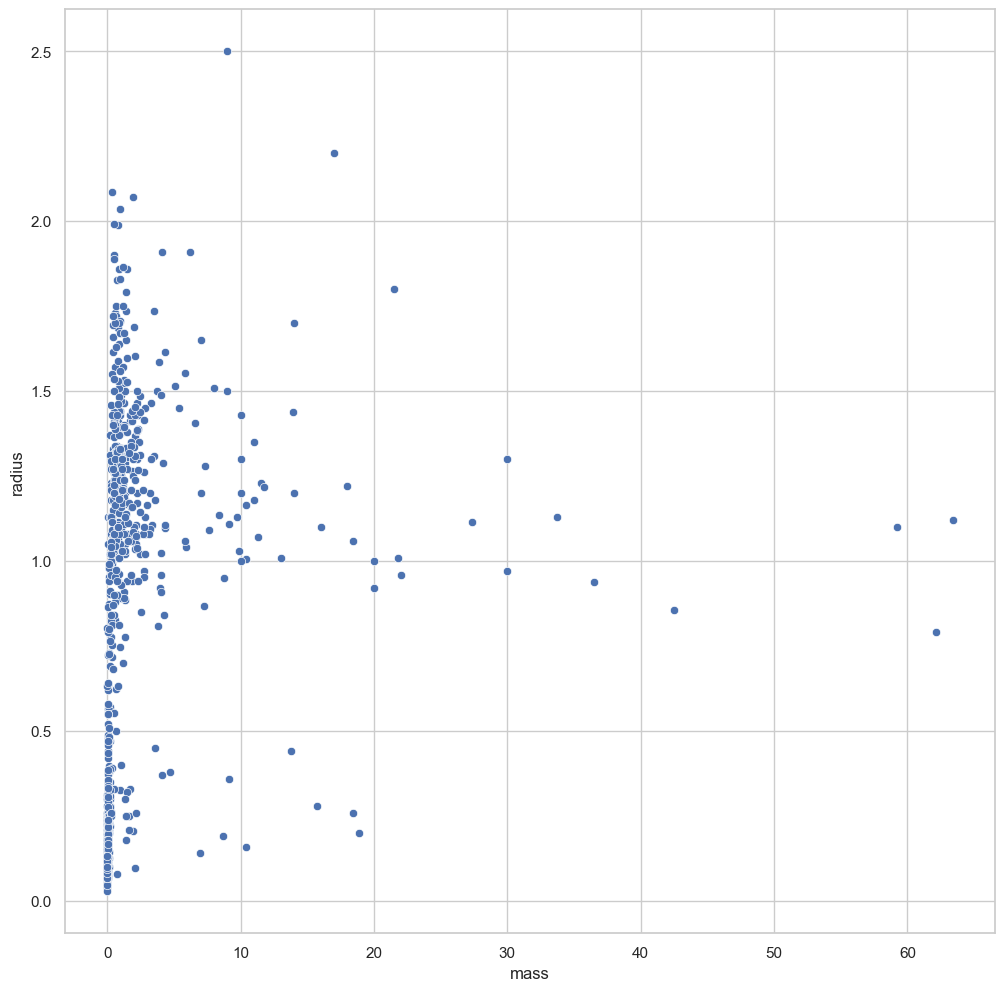

In [54]:

kepler_cleaned = pd.read_csv(path+'kepler_cleaned.csv')


#looking at correlation between mass and radius
fig = sb.scatterplot(data = kepler_cleaned, x = 'mass', y = 'radius', )

Looking at the previous graph, we can't find much correlation between mass and radius. We can however use the values in these columns to calculate the density of each planet. This will allow us to look for a stronger relationship.

In [55]:
def find_density(radius, mass):
    volume = (4/3)*np.pi*(radius**3)
    density = mass/volume
    return density

for m in kepler_cleaned['mass']:
    pos = kepler_cleaned[kepler_cleaned['mass'] == m].index.tolist()
    r = kepler_cleaned['radius'][pos]
    for radius in r:
        if radius != np.nan:
            density = find_density(radius, m)
            #print(density)
            kepler_cleaned.loc[pos, 'density'] = density

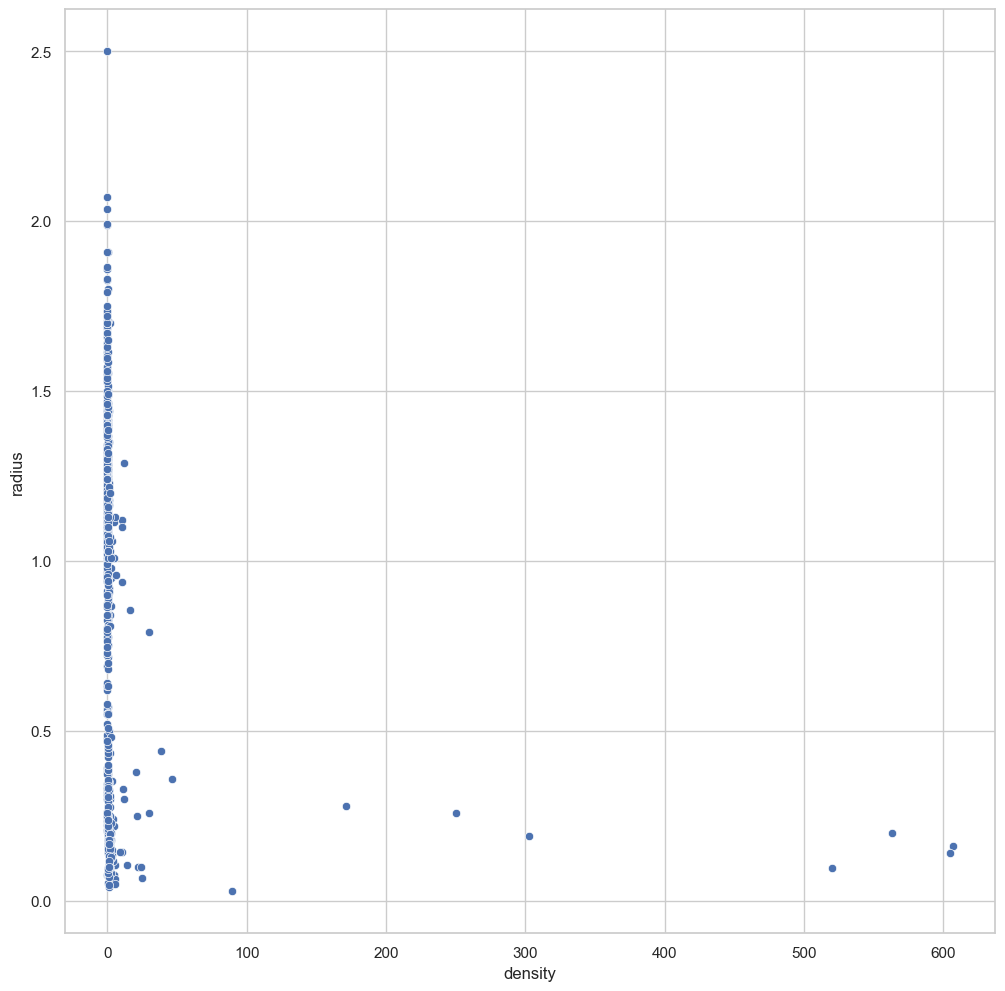

In [56]:
radius_density = sb.scatterplot(data = kepler_cleaned, y = 'radius', x = 'density', palette="rocket")

So we see that there is a correlation between radius and density. This is compatible with our theory seperating gas giants and small rocky planets.

Looking at the molecules, we will find that we are looking at too many different combinations of molecules. We can try and shorten the list. We can also separate the values into different columns to get the individual count for each molecule (H2O, K, CO seperately) and not just each combination. Admittedly, this will not be of much use to us in this notebook because the amount of null values in the molecules column is small. However, this separation can be very useful when looking at categorical data as it allows us to look at it from a different point of view.

In [57]:
##finding out the unique values in molecules

values = kepler_cleaned['molecules'].unique().tolist()
values.remove(values[0])
unique_mol = [np.nan]
for v in values:
    str(v)
    v=v.split()
    for vv in v:
        vv = vv.replace(',','')
        if vv not in unique_mol:
            unique_mol.append(vv)


##adding empty columns for the different molecules to the dataframe. We will use these to keep track of the count for 
#each molecule.
for element in unique_mol:
    kepler_cleaned[element] = np.nan

## adding a 1 to the relevant column each time a planet contains the molecule
for row in values:
    pos = kepler_cleaned[kepler_cleaned['molecules'] == row].index.tolist()

    for element in range(1, len(unique_mol)-1):
        unique_mol[element] = unique_mol[element].replace(',','')

        if unique_mol[element] in row:
                kepler_cleaned.loc[pos, unique_mol[element]] = 1
        else:
                kepler_cleaned.loc[pos, unique_mol[element]] = np.nan

                
##saving to a new dataframe
kepler_cleaned.to_csv(path+'kepler_mol.csv', index = False)

df_mol = pd.read_csv(path+'kepler_mol.csv')

##what do these new columns look like? We won't look at the actual values due to their sparsity but we can look at the column
#counts
print(df_mol[['H2O', 'CO', 'K', 'CH4', 'HCN', 'O2', 'H2', 'N2', 'CO2', 'H', 'NH3', 'O', 'I', 'C', 'Na', 'VO', 'Mg', 'TiO', 'He']].count())

H2O    31
CO     13
K      11
CH4    14
HCN     3
O2      6
H2     32
N2      1
CO2     6
H      37
NH3     3
O      36
I       8
C      25
Na      9
VO      4
Mg      1
TiO     5
He      0
dtype: int64


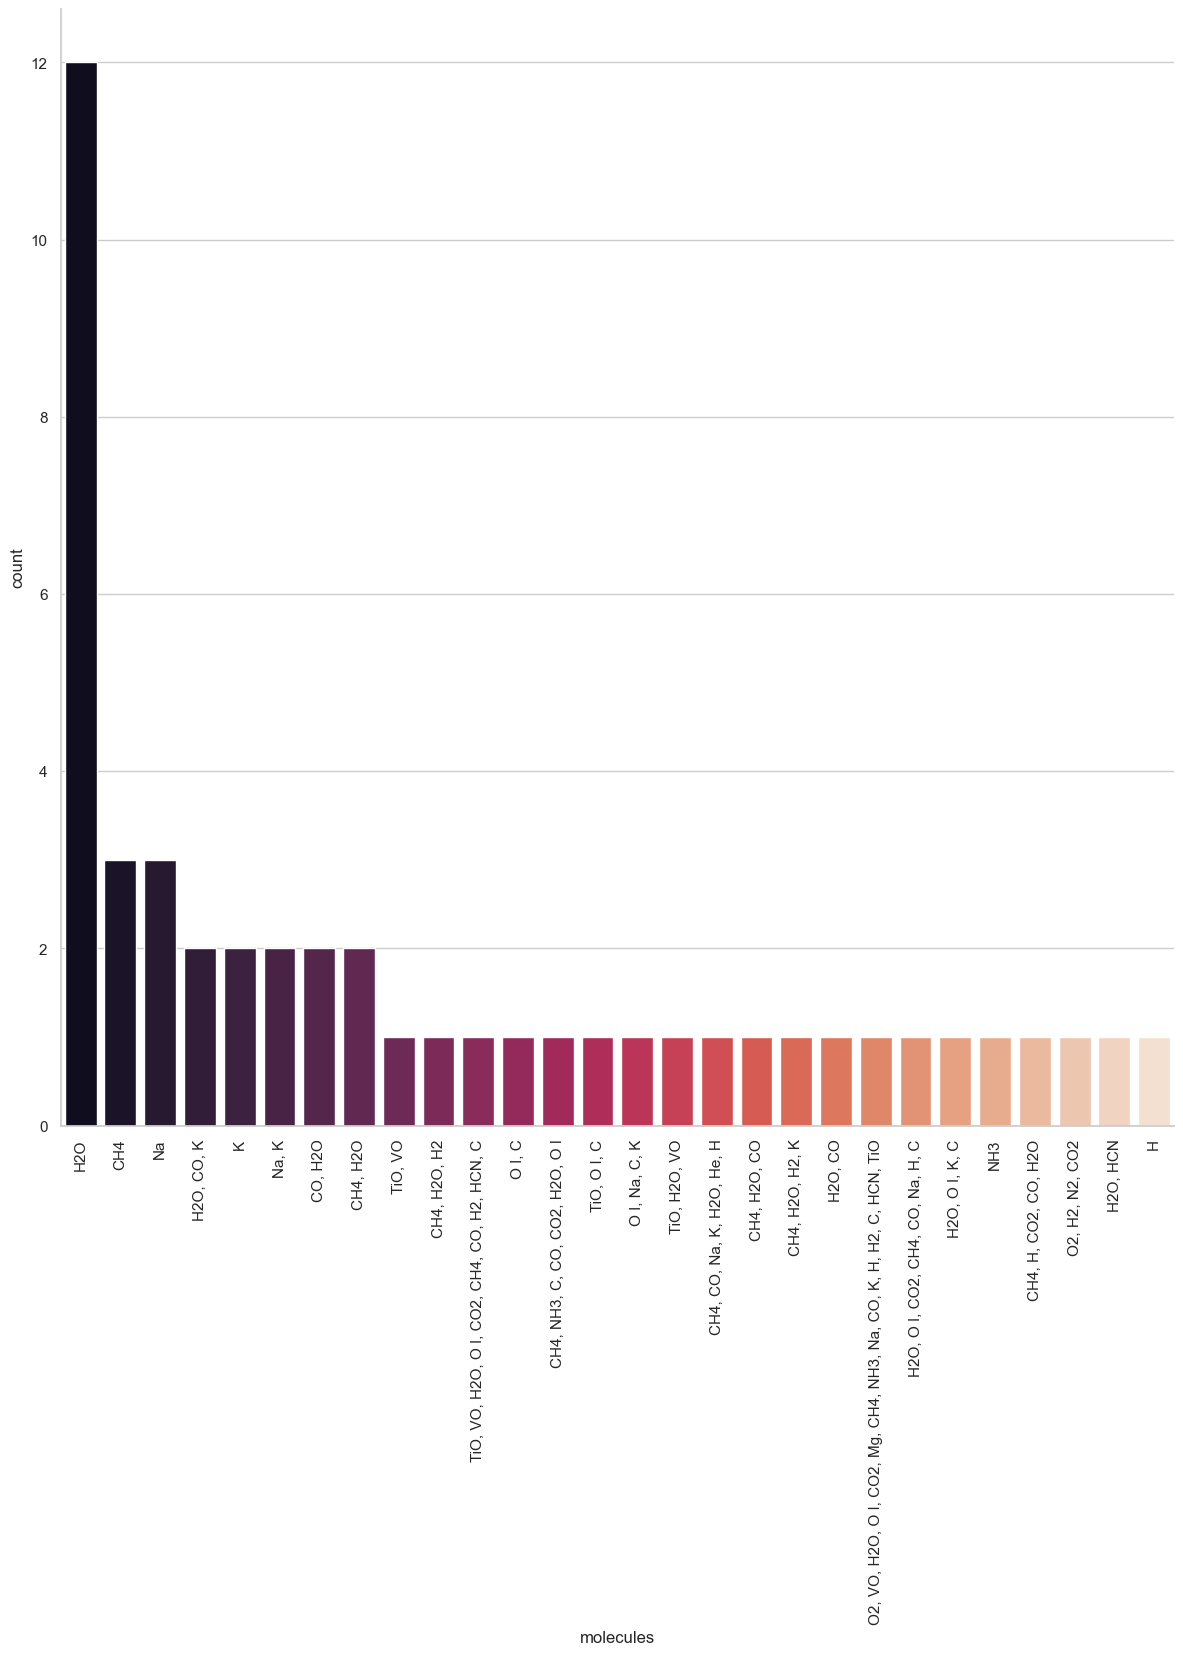

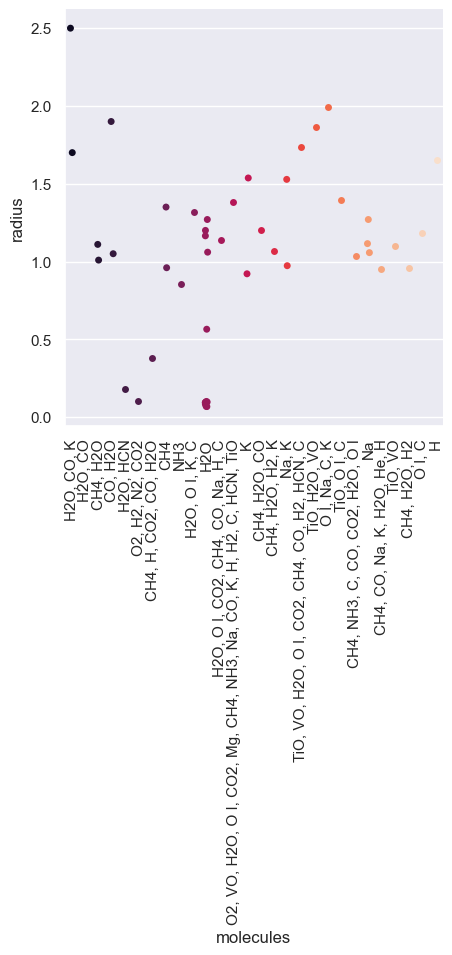

In [58]:
molecules_count = sb.catplot(data=kepler_cleaned, x="molecules", kind="count", palette="rocket", order = kepler_cleaned['molecules'].value_counts().index, height=12, aspect = 1)
plt.pyplot.xticks(rotation=90)
sb.set(rc={'figure.figsize':(12,12)})

mol_rad = sb.catplot(data = kepler_cleaned, x = 'molecules', y = 'radius', palette="rocket")
plt.pyplot.xticks(rotation=90)
sb.set(rc={'figure.figsize':(12,12)})

This graph is very busy. We can make it more relevant by removing the combinations that do not appear a lot.

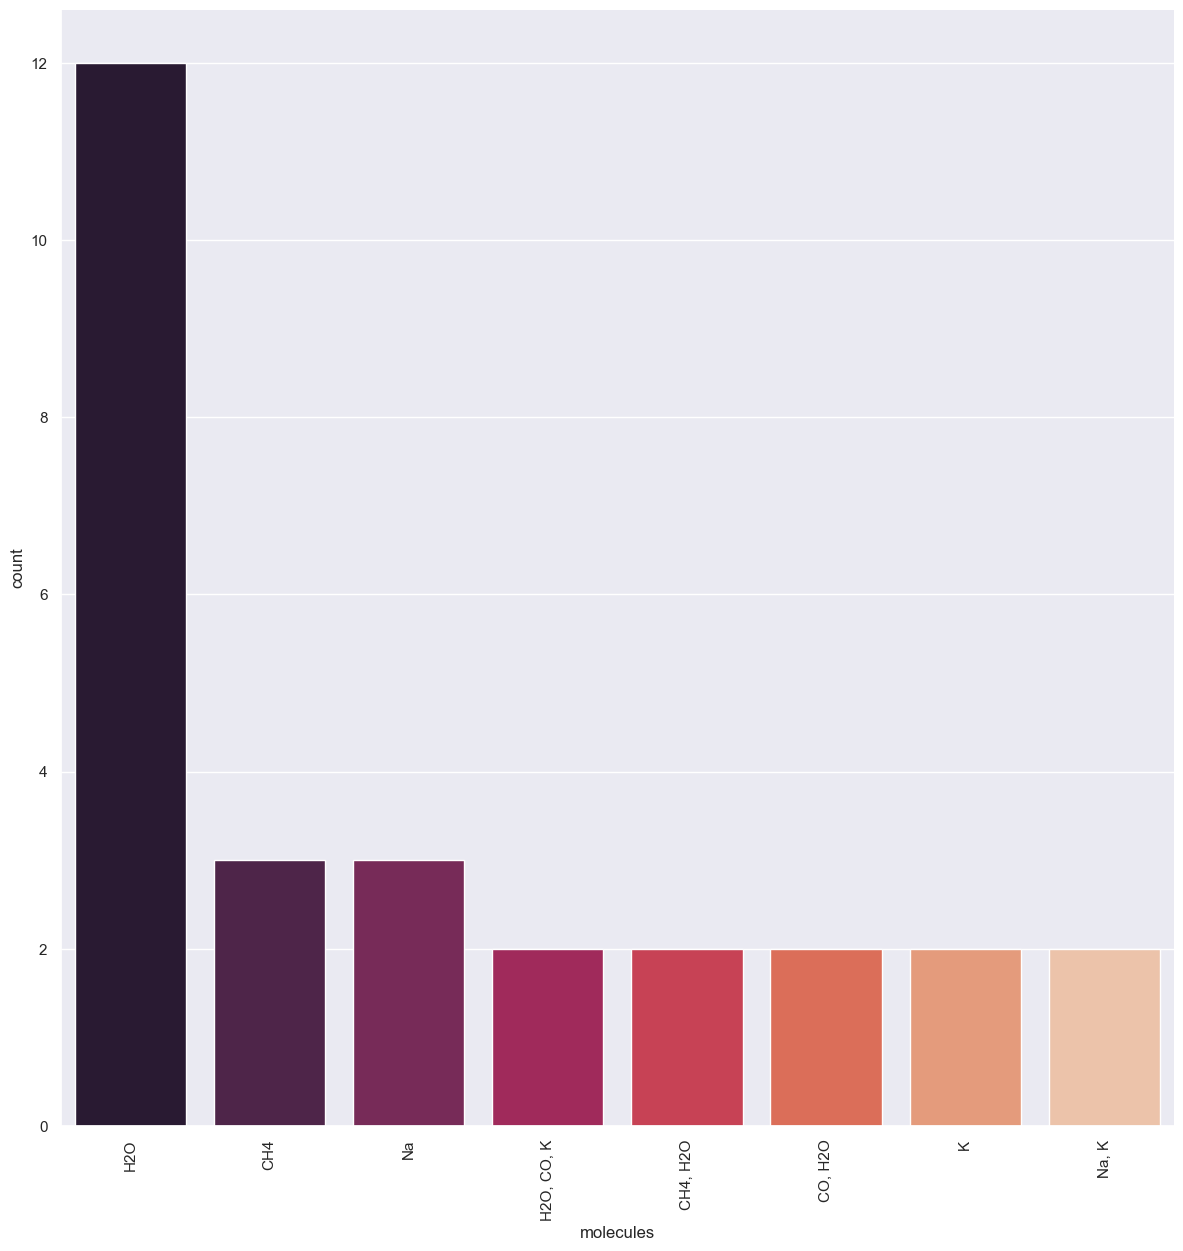

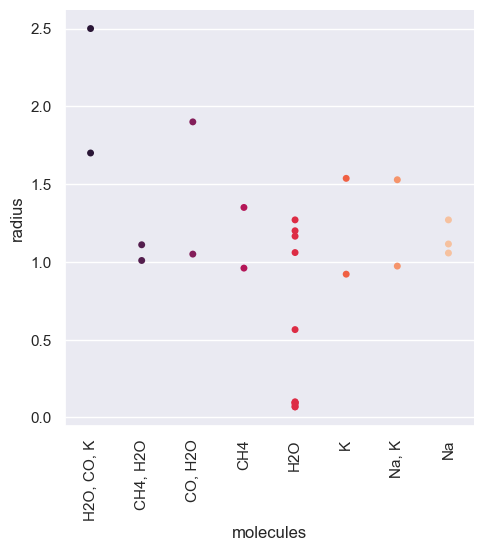

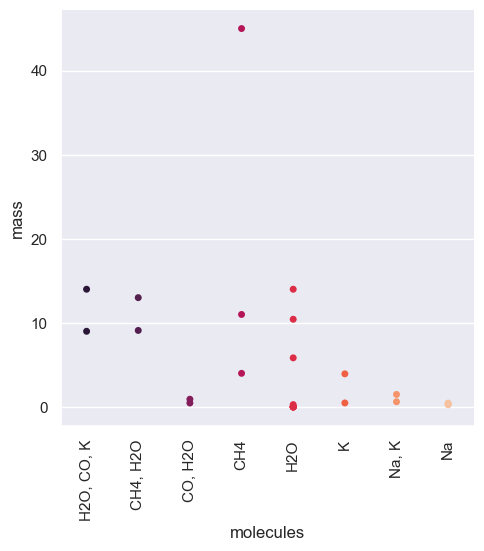

In [59]:
for row in values:
    pos = df_mol[df_mol['molecules'] == row].index.tolist()
    if len(pos)<2:
        df_mol.loc[pos, 'molecules'] = np.nan

##looking at fig again

relevantmol_count = sb.catplot(data=df_mol, x="molecules", kind="count", palette="rocket", order =df_mol['molecules'].value_counts().index, height=12, aspect = 1)
plt.pyplot.xticks(rotation=90)
sb.set(rc={'figure.figsize':(12,12)})

relevantmol_rad = sb.catplot(data = df_mol, x = 'molecules', y = 'radius', jitter = False, palette="rocket")
plt.pyplot.xticks(rotation=90)
sb.set(rc={'figure.figsize':(12,12)})

relevantmol_mass = sb.catplot(data = df_mol, x = 'molecules', y = 'mass', jitter = False, palette="rocket")
plt.pyplot.xticks(rotation=90)
sb.set(rc={'figure.figsize':(12,12)})

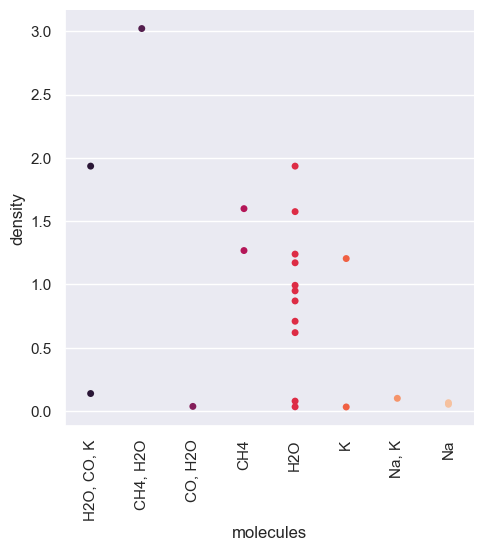

In [60]:
##using density instead of mass

fig = sb.catplot(data = df_mol, x = 'molecules', y = 'density', jitter = False, palette="rocket")
plt.pyplot.xticks(rotation=90)
sb.set(rc={'figure.figsize':(12,12)})

We can see that there might be a correlation between the composition of the planets and their density. Although we know that this idea is correct, we cannot say that this dataset confirms this as we have too few points of data for this column. Given the amount of data, we have we could be making assumptions about what the dataset looks like due to our implicit bias.

## Use of categorical data alongside numerical data

Our analysis of the categorical data so far has not given us many answers due to the sparsity of the column we were interested in. We can use a different column that we had previously put aside. Interesting ones to look at will be the detection rate (_'discovered'_) and methods (_'detection_type'_).

We can add a column from one data frame to another with `insert()`.

In [61]:
df_mol.insert(1, 'discovered', kepler_base['discovered'].fillna(0).astype(int))
df_mol.insert(1, 'detection_type', kepler_base['detection_type'])

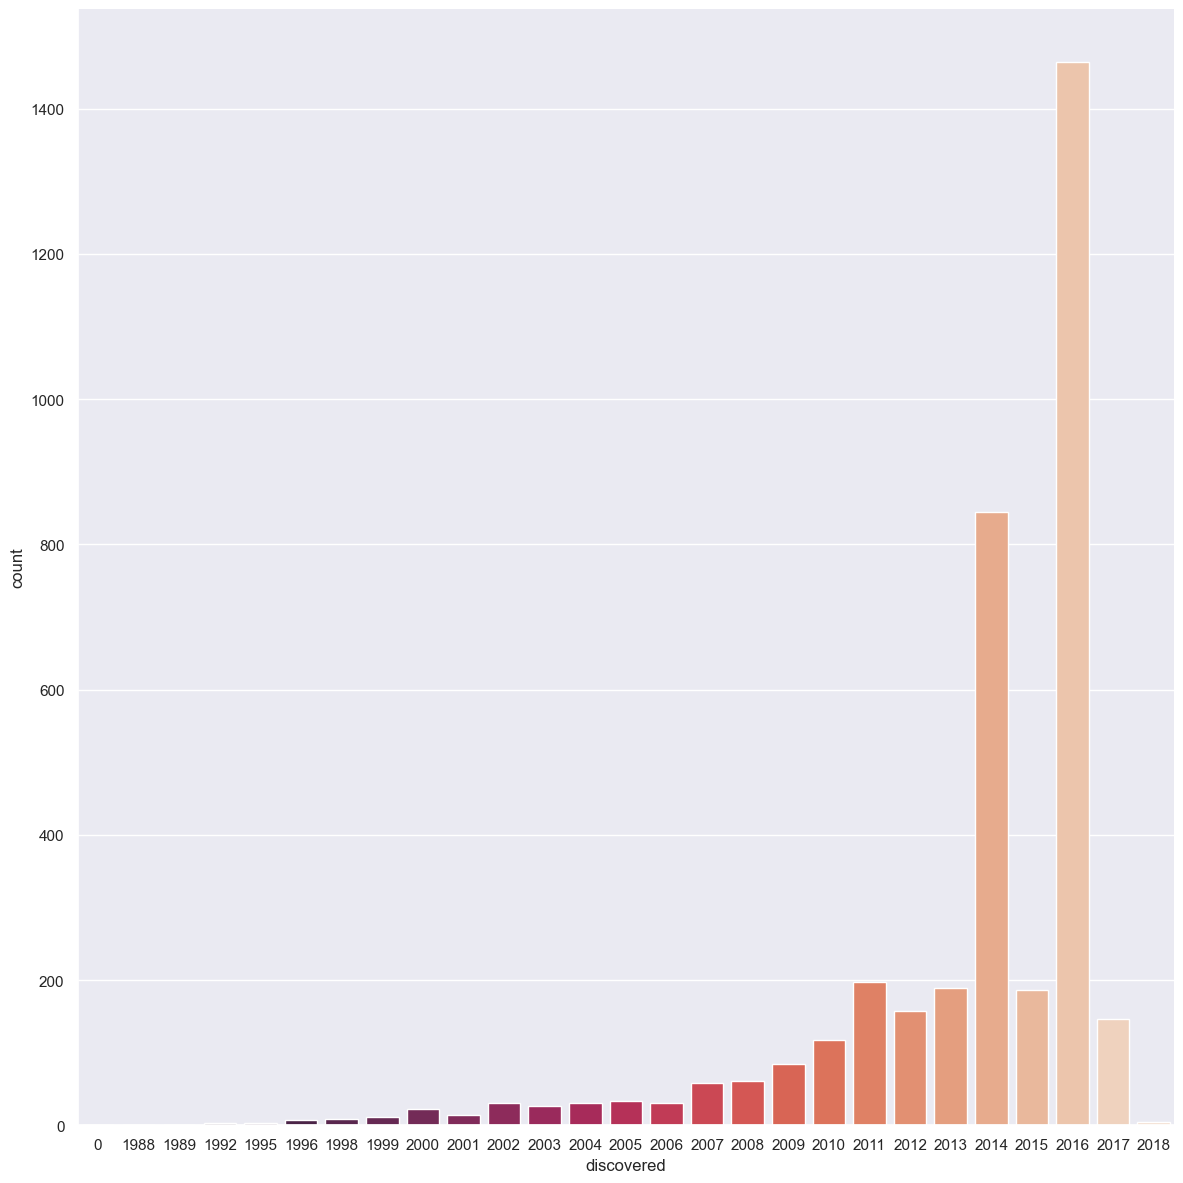

In [62]:
discyear = sb.catplot(data = df_mol, x='discovered', kind="count", palette="rocket", height=12, aspect = 1)

We notice that 2016 was a good year. But we can wonder what happens if we also consider the detection type. Let us first visualise the different detection types and how they perform. We can then separate them into 3 categories based on the 2 highest performers and the others.

['Microlensing' 'Radial Velocity' 'Imaging' 'Primary Transit' 'Pulsar'
 'Other' 'Astrometry' 'TTV' 'Primary Transit, TTV']


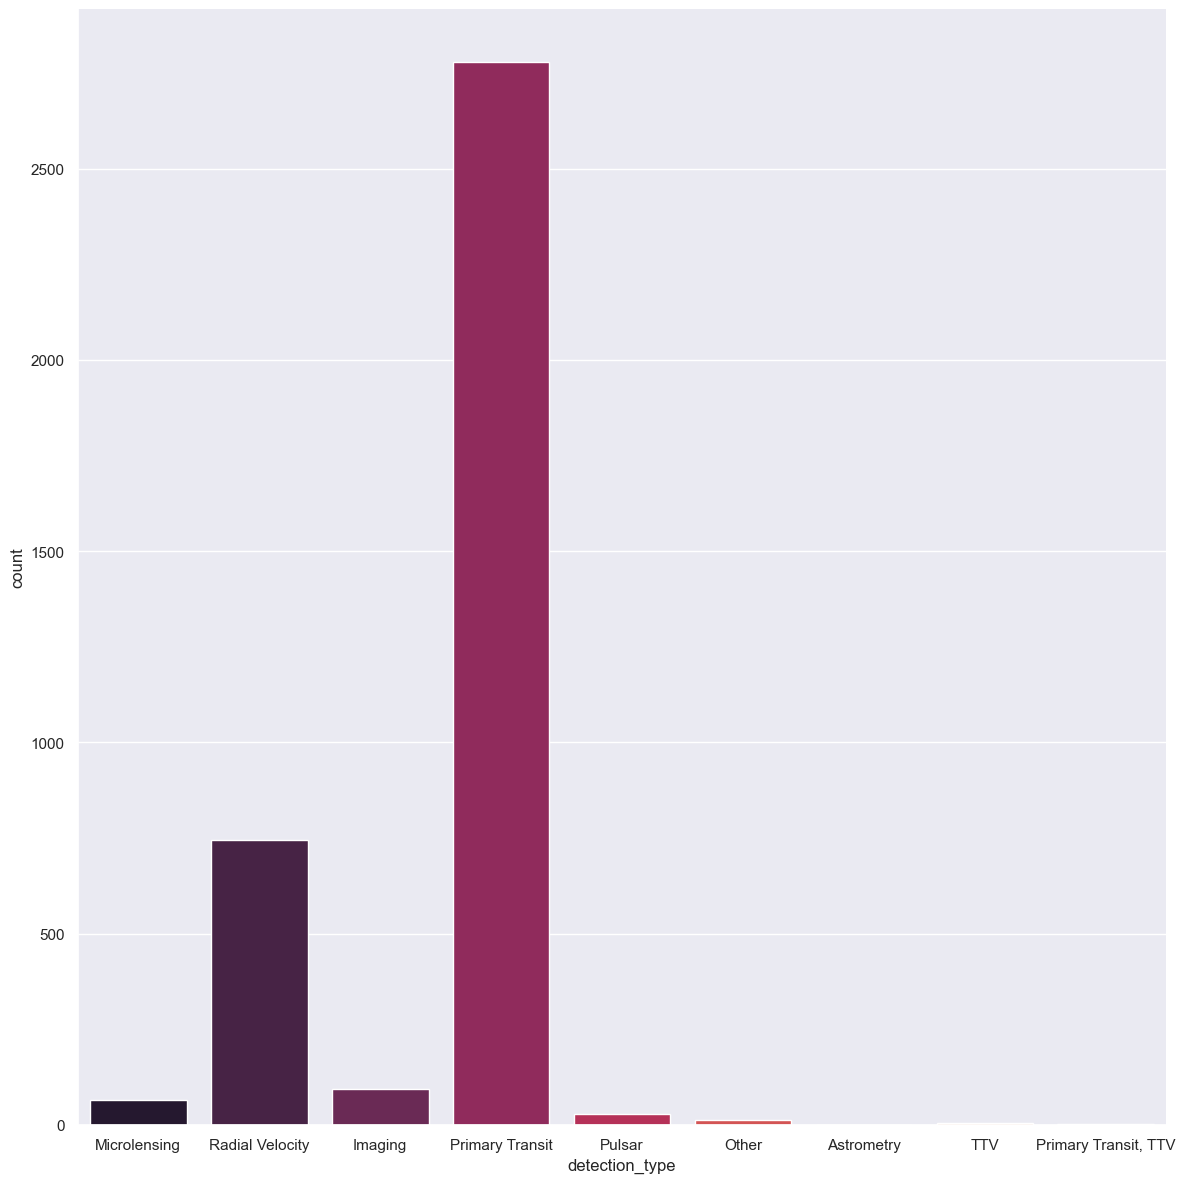

In [63]:
print(df_mol['detection_type'].unique())

typeperf = sb.catplot(data = df_mol, x='detection_type', kind="count", palette="rocket", height=12, aspect = 1)

['Other' 'Radial Velocity' 'Primary Transit']


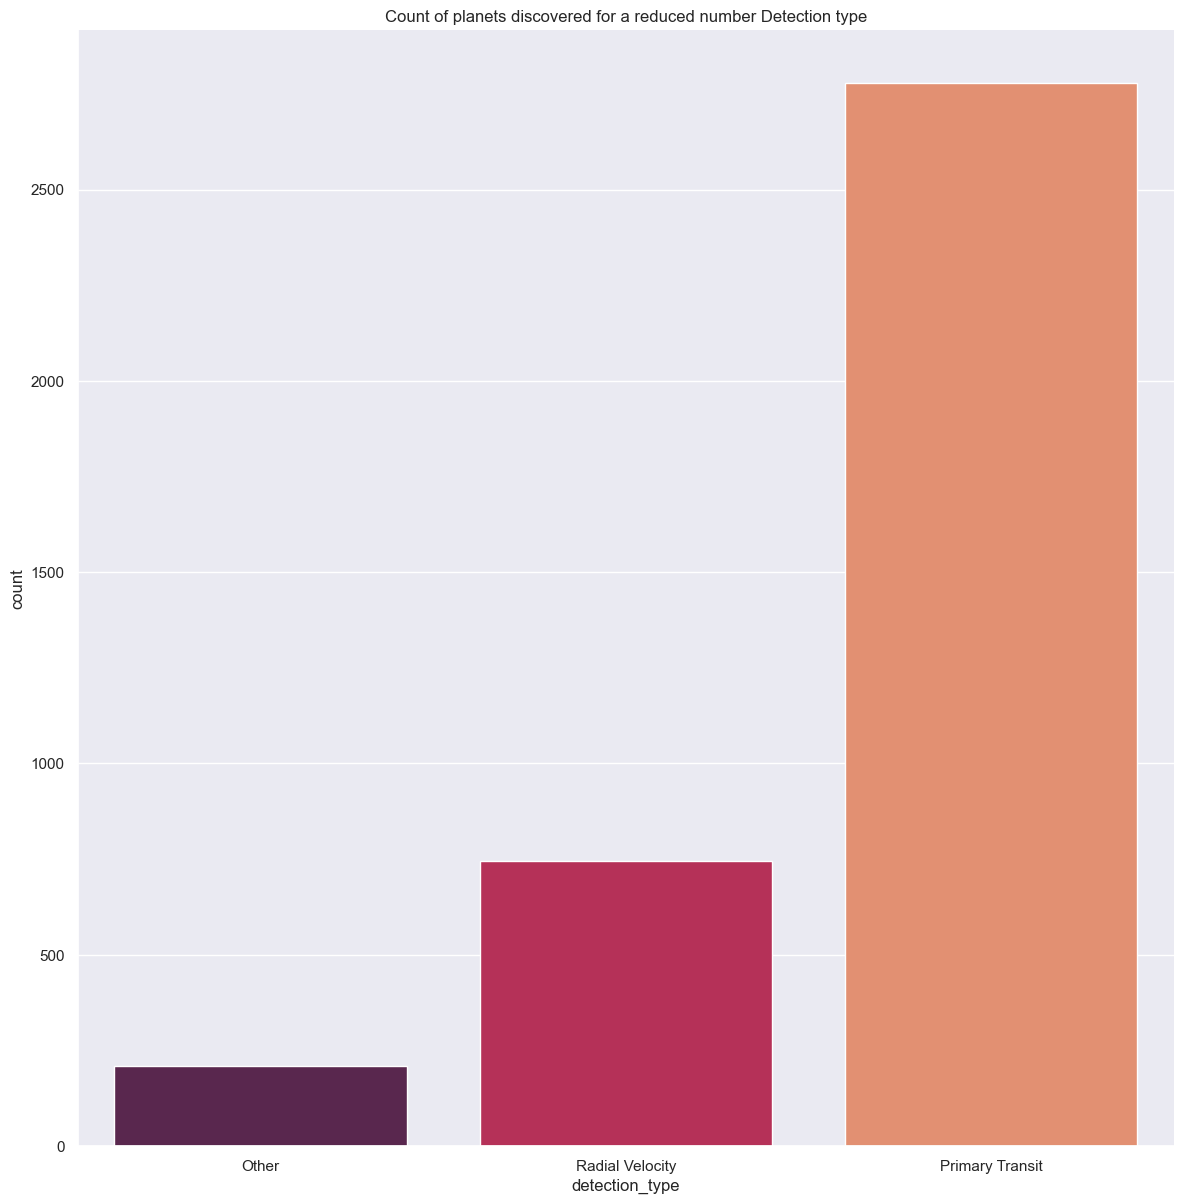

In [64]:
for type in df_mol['detection_type']:
    type = str(type)
    pos = df_mol[df_mol['detection_type'] == type].index.tolist()
    if type == 'Primary Transit, TTV':
        df_mol.loc[pos, 'detection_type'] = 'Primary Transit'
    if type not in ['Primary Transit', 'Radial Velocity', np.nan]:
        df_mol.loc[pos, 'detection_type'] = 'Other'
        
print(df_mol['detection_type'].unique())
typeperf = sb.catplot(data = df_mol, x='detection_type', kind="count", palette="rocket", height=12, aspect = 1)

typeperf.set(title='Count of planets discovered for a reduced number Detection type')

With these 3 detection methods we can look at how many exoplanets they discovered each and whether there was an evolution in their performance rate.

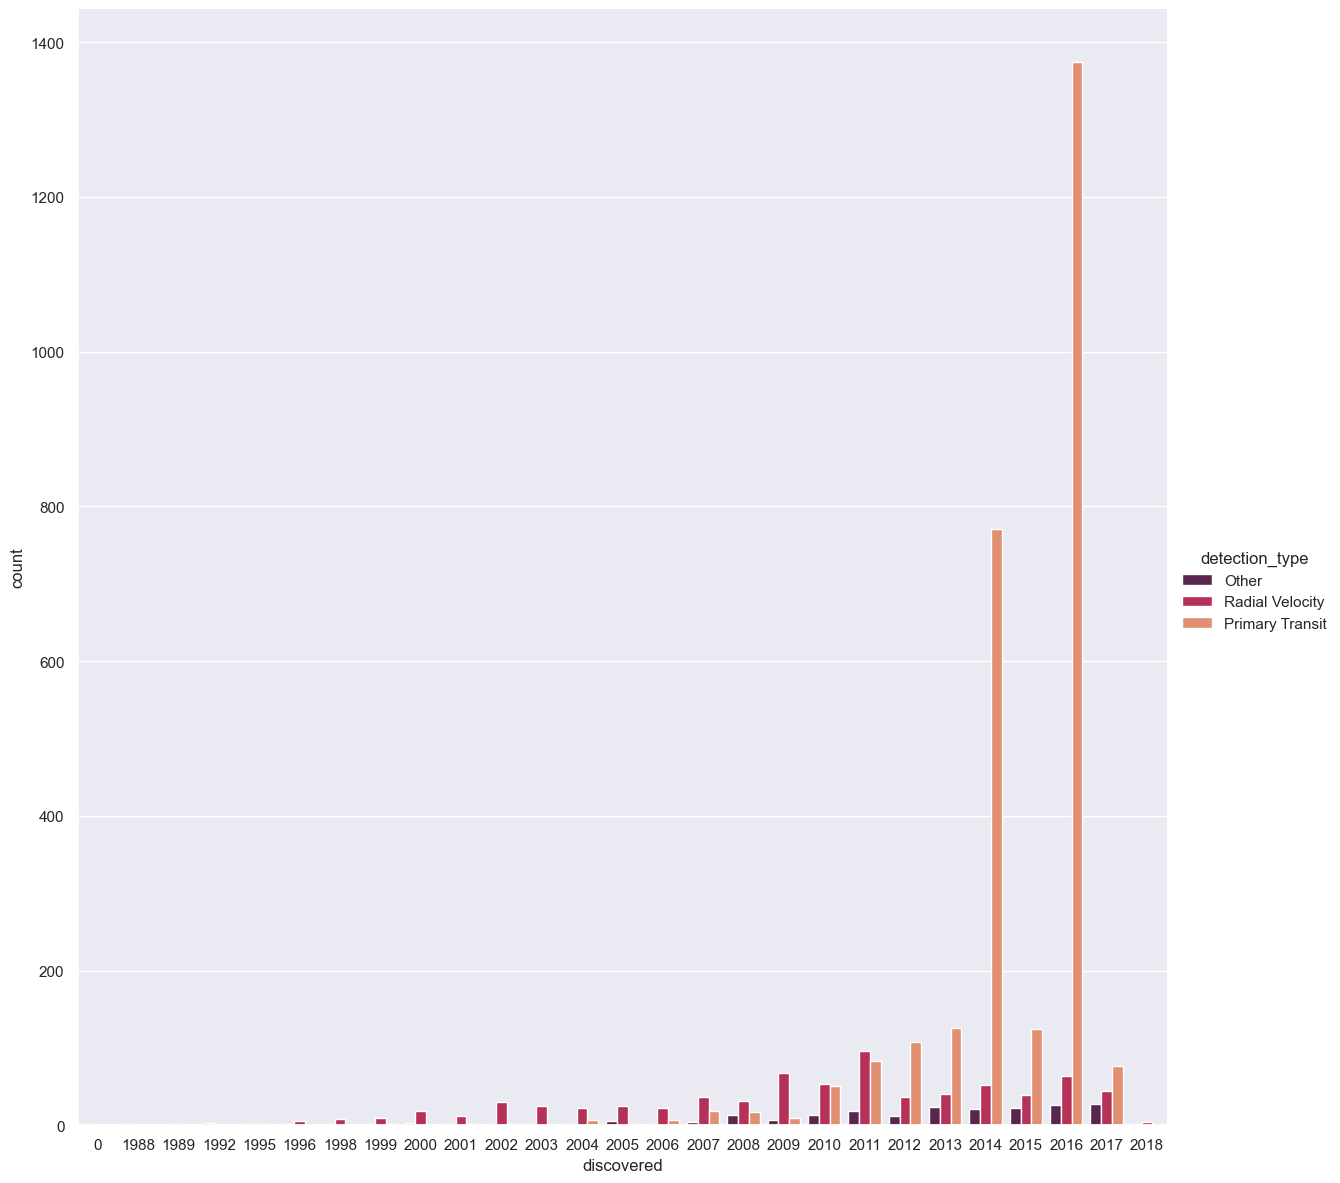

In [65]:
detectionbytype = sb.catplot(data = df_mol, x='discovered', hue = 'detection_type', kind="count", palette="rocket", height=12, aspect = 1)

We see that whilst Primary transit has discovered the most exoplanets by far, it only surpassed detection by radial velocity in 2012. We can even mix our cleaned categorical data with the numerical data. For example, we can look at whether the detection type influenced what type of planet was discovered (are some types better with denser planets, for example). To do this we use seaborn's __hue__ parameter for our graph.

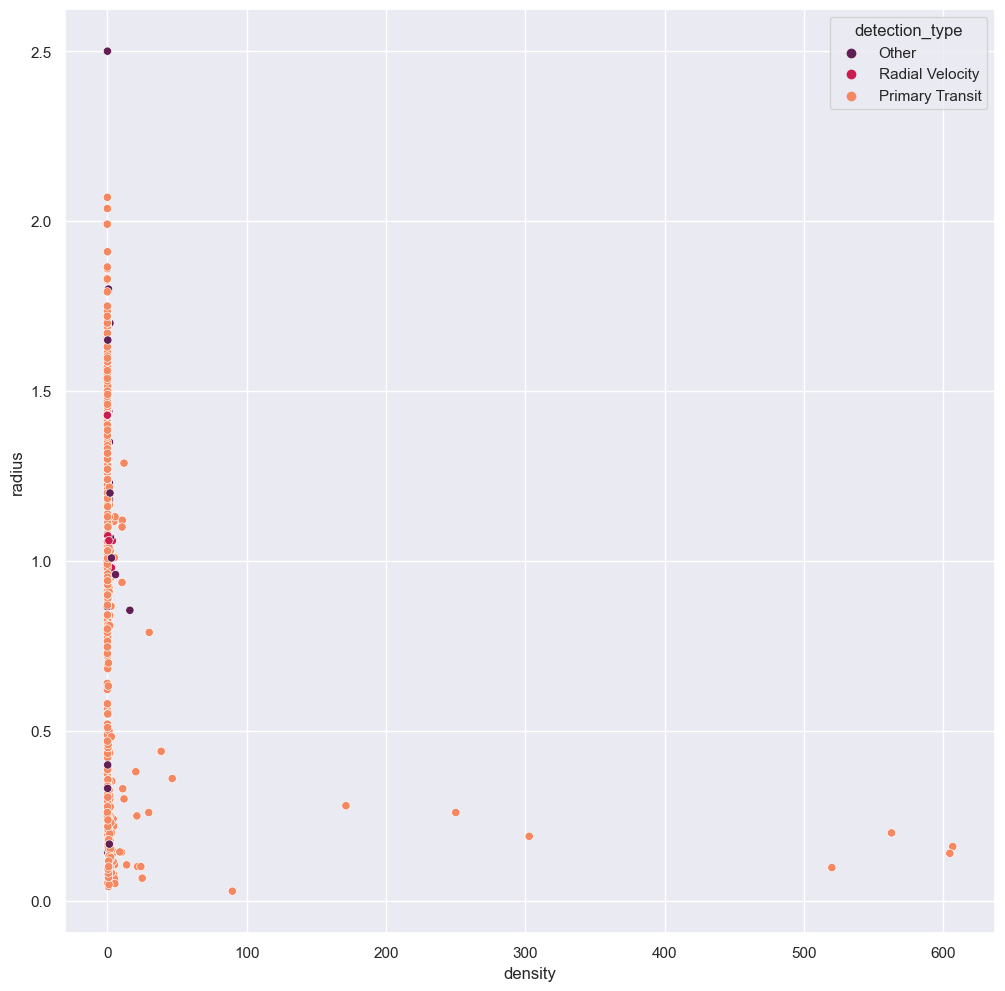

In [66]:
numandcat = sb.scatterplot(data = df_mol, y = 'radius', x = 'density', hue= 'detection_type', palette="rocket")

You can imagine how difficult it would have been to read this graph had we not collected the lesser detection methods together. We would have had a very long key and too many colours on the graph for it to be readable. Our cleaning has allowed us to immediately notice that Primary transit as a detection method is good for all exoplanets, whereas the other methods only picked up exoplanets with small densities. 

## Conclusion and final thoughts

So by looking at a few columns in this dataset we have shown the separation between gas giants and small rocky planets. We also observed that this dataset is not able to give a relation between the densities of the exoplanets and their molecular composition. Finally, we looked at the evolution of detection apparatus and detection rates for exoplanets. We saw that there was a correlation between the detection apparatus used and the density of a planet.

These observations would not have been possible or would have been very difficult had we not cleaned the dataset first.

Given that we have found a correlation between density and detection type and have seen the varying use of the different detection types across the years: can you find a way to look at the evolution of the densities of the exoplanets observed throughout the years? There are some numerical data columns left in this clean dataset for you to work on if you would like.

References:

- You can find the dataset __[here](http://exoplanet.eu/)__
- Documentation on pandas can be found __[here](https://pandas.pydata.org/docs/getting_started/intro_tutorials/)__